In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download facebook-recruiting-iii-keyword-extraction -f Train.zip

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /N/u/adigode/Carbonate/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /N/u/adigode/Carbonate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /N/u/adigode/Carbonate/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /N/u/adigode/Carbonate/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
train_data = pd.read_csv("Train.csv")
len(train_data)

6034195

In [7]:
data = train_data.drop_duplicates(subset = ["Title","Tags"])
len(data)

4186184

Dropping rows with no tags

In [8]:
data['Tags'].isna().sum()

7

In [9]:
data = data.dropna(subset=['Tags'])

Using 200000 records for computation purposes

In [10]:
data_split = data.loc[:200000]

In [11]:
data_split = data_split.reset_index(drop = True)

Doing data-preprocessing on the data

In [12]:
def lemmatize(name):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    lemmatizer = WordNetLemmatizer()

    lemmatized = []

    for i in range(len(data_split)):
      ls = ""
      for word, tag in pos_tag(data_split[name][i]):
        ls += " " + lemmatizer.lemmatize(word, tag_map[tag[0]])
      lemmatized.append(ls)
    return lemmatized

In [13]:
def preprocessing(columnname, name):
    #removing html tags
    cleantext = []
    for i in range(len(data_split)):
      cleantext.append(BeautifulSoup(data_split[columnname][i], "html").text)
    
    data_split[name] = cleantext
    #removing special characters
    data_split[name] = data_split[name].apply(lambda x : re.sub(r"[^a-zA-Z0-9]+", ' ', x))
    #converting text to lowercase
    data_split[name] = data_split[name].apply(lambda s: s.lower() if type(s) == str else s)
    #tokenize the text
    data_split[name] = data_split[name].apply(lambda x : word_tokenize(x))
    #removing all stopwords. Not dropping a word if it contains 'c' or 'r'(programming langauges) 
    stopword = stopwords.words('english')
    data_split[name] = data_split[name].apply(lambda x : [word for word in x if not word in stopword or word=='c' or word=='r'])
    name_new = name + " " + "tokens"
    #converting all the words of each Body into their root form using lemmatizer
    data_split[name_new] = lemmatize(name)



In [14]:
#pre-processing text in body column
preprocessing('Body','clean body text')
#pre-processing text in title column
preprocessing('Title','clean title text')

/N/soft/rhel7/anaconda/python3.8/2020.07/lib/python3.8/site-packages/bs4/__init__.py:414: MarkupResemblesLocatorWarning: "http://127.0.0.1:8500/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [15]:
data_split

,Id,Title,Body,Tags,clean body text,clean body text tokens,clean title text,clean title text tokens
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...,"[like, check, uploaded, file, image, file, e, ...",like check upload file image file e g png jpg...,"[check, uploaded, file, image, without, mime, ...",check upload file image without mime type
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox,"[favorite, editor, vim, regularly, use, ctrl, ...",favorite editor vim regularly use ctrl w exec...,"[prevent, firefox, closing, press, ctrl, w]",prevent firefox close press ctrl w
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning,"[import, matlab, file, construct, data, frame,...",import matlab file construct data frame matla...,"[r, error, invalid, type, list, variable]",r error invalid type list variable
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding,"[probably, simple, simply, find, answer, basic...",probably simple simply find answer basicaly w...,"[replace, special, characters, url]",replace special character url
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents,"[function, modify, mcontact, file, get, conten...",function modify mcontact file get content htt...,"[modify, whois, contact, details]",modify whois contact detail
...,...,...,...,...,...,...,...,...
197719,199997,Custom clipping path over HTML <div>,<p>After unsuccessful experimentation with SVG...,javascript jquery css svg mask,"[unsuccessful, experimentation, svg, looking, ...",unsuccessful experimentation svg look use ano...,"[custom, clipping, path, html]",custom clip path html
197720,199998,git alias for HEAD:refs/for/master,<p>I am configuring <code>Gerrit</code> and I ...,git gerrit,"[configuring, gerrit, would, like, avoid, writ...",configure gerrit would like avoid write git p...,"[git, alias, head, refs, master]",git alias head ref master
197721,199999,Can i prevent the keyboard to push things up w...,<p>I am using sencha touch beta 3 version at t...,android ios sencha-touch sencha sencha-touch-2,"[using, sencha, touch, beta, 3, version, momen...",use sencha touch beta 3 version moment header...,"[prevent, keyboard, push, things, shown]",prevent keyboard push thing show
197722,200000,Excel time dd/hh/mm conversion to minutes only,<p>How do I convert turn around time written i...,excel excel-formula,"[convert, turn, around, time, written, excel, ...",convert turn around time write excel cell 0d ...,"[excel, time, dd, hh, mm, conversion, minutes]",excel time dd hh mm conversion minute


Total number of tags and unique tags in 200000 of training data

In [22]:
tags = data_split['Tags'].str.cat(sep=' ')


tags = list(tags.split(" "))

print("Total tags present",len(tags))
print("Total unique tags present:",len(list(set(tags))))

Total tags present 571038
Total unique tags present: 23686


In [23]:
tag_count = {}
unique_tags = list(set(tags))

for tag in unique_tags:
  #print(tag)
  tag_count[tag] = tags.count(tag)



Creating a dataframe of unique tags and the number of times each tag is appears in the answer.

In [24]:
sorted_tags = pd.DataFrame(sorted(tag_count.items(), key=lambda item: item[1],reverse=True),columns=['tags','count'])
sorted_tags

,tags,count
0,c#,15288
1,java,13495
2,php,12811
3,javascript,12039
4,android,10503
...,...,...
23681,geomap,1
23682,raid-controller,1
23683,webpage-rendering,1
23684,transmitfile,1


In [25]:

sorted_tags.head(50)['tags']

0                     c#
1                   java
2                    php
3             javascript
4                android
5                 jquery
6                    c++
7                 python
8                 iphone
9                asp.net
10                 mysql
11                  html
12                  .net
13                   ios
14           objective-c
15                   sql
16                   css
17                 linux
18         ruby-on-rails
19                     c
20               windows
21            sql-server
22                  ruby
23                   wpf
24                   xml
25                  ajax
26              database
27             windows-7
28           asp.net-mvc
29                 regex
30                   osx
31                 xcode
32                django
33                arrays
34                vb.net
35               eclipse
36              facebook
37       ruby-on-rails-3
38                  json
39                ubuntu


Plotting top 30 used tags

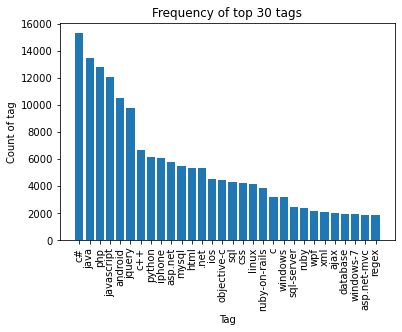

In [26]:
import matplotlib.pyplot as plt

plt.bar(sorted_tags.head(30)['tags'],sorted_tags.head(30)['count'])
plt.xticks(rotation=90)
plt.xlabel('Tag')
plt.ylabel('Count of tag')
plt.title('Frequency of top 30 tags')
plt.show()


Total number of words and unique words in the 200000 training data

In [105]:
words = []
for index,row in data_split.iterrows():
  #print(clean_text)
  words.extend(row['clean body text tokens'].split(" "))


unique_words = list(set(words))

print("Total words present",len(words))
print("Total unique words present:",len(unique_words))

Total words present 19478671
Total unique words present: 511405


Plotting tags per answer and estimating the average number of tags given in each answer

average tags per answer is: 2.8880560781695697


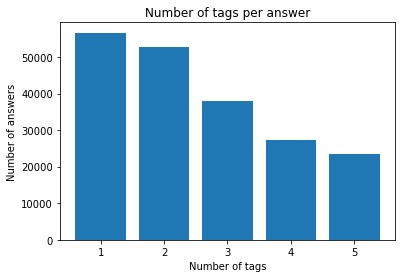

In [28]:
import numpy as np
tags_c = list(data_split['Tags'])
count = []
for row in tags_c:

  count.append(len(row.split(' ')))

#print(len(count))
count_df = pd.DataFrame(count,columns=['count'])
counts = count_df['count'].value_counts()
s = [i * counts[i] for i in range(1,6)]

averarge_tags = np.sum(s)/len(count)
print("average tags per answer is:",averarge_tags)

a = np.arange(1,6)

plt.bar(a,counts)
plt.xlabel('Number of tags')
plt.ylabel('Number of answers')
plt.title('Number of tags per answer')
plt.show()




#tags_array = np.array([len(tags_c.split(", "))])

In [29]:
data_split['Tags']

0         php image-processing file-upload upload mime-t...
1                                                   firefox
2                                 r matlab machine-learning
3                                           c# url encoding
4                                 php api file-get-contents
                                ...                        
197719                       javascript jquery css svg mask
197720                                           git gerrit
197721       android ios sencha-touch sencha sencha-touch-2
197722                                  excel excel-formula
197723                         solr ruby-on-rails-3 sunspot
Name: Tags, Length: 197724, dtype: object

In [30]:
tags = data_split['Tags'].str.cat(sep=',')

print(tags)
tags = list(tags.split(","))
print(tags)

print("Total tags present",len(tags))
print("Total unique tags present:",len(list(set(tags))))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Observations:<br>
1) The maximum number of tags per question is 5 and the minimum number of tags per question is 1<br>
2) The most frequent number of tags per question is 1.<br>
3) The least frequent number of tags per question is 5.<br>
4) Most questions have 1, 2 or 3 tags.<br>
5) Average number of tags per question is 2.8<br>
6) This is a multi-label classification problem

Making a list of top 500(most frequent) tags

In [34]:
top500_tags = sorted_tags['tags'][:500]
type(top500_tags)
type(top500_tags)
top500_tags_list = list(top500_tags)

#top500_tags_list

Dropping all tags except top 500 tags from every record

In [35]:
def find_most_frequent_tags(x):
 
  list1 = x.split(" ")
  result = ""
  for tag in list1:
    
    if tag in top500_tags_list:
     
      result+= " " + tag
  return result


In [36]:
data_tags = data_split['Tags'].apply(lambda x: find_most_frequent_tags(x))
print("after taking top 500 frequency tags",data_tags.shape)
#replacing 'Tags' column for a record with 'None' if the length of tags is zero i.e. the record does not have any tags among top 500 tags
data_tags = data_tags.apply(lambda x: x if len(x)>0 else None)
#concating title, body, tags together into a single dataframe
data_new = pd.concat([data_split[['clean title text tokens','clean body text tokens']],data_tags],axis=1)
print(data_new.shape)
print(data_new)

data_new.reset_index(drop=True)
#Dropping all tags with value 'None'
data_new.dropna(subset= ['Tags'],inplace = True)
print("After dropping tags with 0 length",data_new.shape)
data_new.reset_index(drop= True)
print("data new is", data_new)
type(data_new.head())




after taking top 500 frequency tags (197724,)
(197724, 3)
                           clean title text tokens  \
0        check upload file image without mime type   
1               prevent firefox close press ctrl w   
2               r error invalid type list variable   
3                    replace special character url   
4                      modify whois contact detail   
...                                            ...   
197719                       custom clip path html   
197720                   git alias head ref master   
197721            prevent keyboard push thing show   
197722       excel time dd hh mm conversion minute   
197723                make sunspot solr start work   

                                   clean body text tokens  \
0        like check upload file image file e g png jpg...   
1        favorite editor vim regularly use ctrl w exec...   
2        import matlab file construct data frame matla...   
3        probably simple simply find answer basic

pandas.core.frame.DataFrame

vetorizing labels(tags) with 0 or 1(binary vectorizer)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vec = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
y = vec.fit_transform(data_new['Tags'])


feature extracting using tfidf for both body and titles. We will get sparse matrics as out after fit and transform

In [39]:
tfidf_body = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2",tokenizer = lambda x: x.split(), sublinear_tf=False,ngram_range=(1,4))
tfidf_title = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2",tokenizer = lambda x: x.split(), sublinear_tf=False,ngram_range=(1,4))
x_train_tfidf_body = tfidf_body.fit_transform(data_new['clean body text tokens'])
x_train_tfidf_title = tfidf_title.fit_transform(data_new['clean title text tokens'])
#x_test_tfidf = tfidf.transform(x_test)


stacking body and title side to side(horizontally/column-wise)

In [40]:
from scipy.sparse import hstack
x = hstack([x_train_tfidf_body,x_train_tfidf_title])


Splitting data into train and test 

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 0)

In [43]:
print("shape of train data X:",x_train.shape, "Y :",y_train.shape)
print("Shape of test data X:",x_test.shape,"Y:",y_test.shape)

shape of train data X: (141780, 28912) Y : (141780, 500)
Shape of test data X: (35446, 28912) Y: (35446, 500)


training and testing OneVsRest classifier with SGD as base classifier with loss as 'log'. SGD with log loss implements Logisitc Regression

In [136]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
import time

start = time.time()

classifier_log = OneVsRestClassifier(SGDClassifier(loss='log',
                                               alpha=0.00001,
                                               penalty='l1'), n_jobs=-1)

classifier_log.fit(x_train, y_train)
predictions = classifier_log.predict(x_test)


print("Accuracy :",accuracy_score(y_test, predictions))
print("Hamming loss ",hamming_loss(y_test,predictions))


Accuracy : 0.20295661005473115
Hamming loss  0.002923376403543418


In [137]:
from sklearn.metrics import classification_report

print (classification_report(y_test, predictions))
print("Time taken to run this cell :", round(time.time()- start, 0))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72       143
           1       0.60      0.14      0.23      1066
           2       0.50      0.02      0.05        42
           3       0.62      0.11      0.18        47
           4       0.00      0.00      0.00        45
           5       0.37      0.18      0.24        39
           6       0.69      0.23      0.35        77
           7       0.33      0.06      0.10        35
           8       0.78      0.40      0.53       178
           9       0.73      0.49      0.59        74
          10       0.68      0.35      0.46        78
          11       0.26      0.13      0.17        47
          12       1.00      0.15      0.26        40
          13       0.68      0.44      0.53       388
          14       0.55      0.10      0.17        58
          15       0.63      0.21      0.31       197
          16       0.92      0.52      0.67        65
          17       0.57    

/N/soft/rhel7/anaconda/python3.8/2020.07/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/N/soft/rhel7/anaconda/python3.8/2020.07/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sample result/tag prediction for logistic regression

In [138]:
test_sent = ["import pandas as pd import numpy as np FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error will result in an error"]
tfidf_test = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2",tokenizer = lambda x: x.split(), sublinear_tf=False,ngram_range=(1,4))
#test_sent = ["It does not usually make sense to convert character data to numeric, but if the letters refer to an ordered sequence of events/phases/periods, then it may be useful. R uses factors for this purpose. For example"]
#test_sent = ["Scikit-learn error"]
qs = tfidf_body.transform(test_sent)
print(qs.shape)
qs2 = tfidf_title.transform(test_sent)
print(qs2.shape)

q = hstack([qs,qs2])
q.shape

(1, 20000)
(1, 8912)


(1, 28912)

In [139]:
op = classifier_log.predict(q)

In [140]:
print(op)

  (0, 210)	1
  (0, 308)	1
  (0, 347)	1


Predicted tags:

In [141]:
print(vec.get_feature_names()[308])
print(vec.get_feature_names()[347])
print(vec.get_feature_names()[201])

numpy
python
https


OneVsRest with Random forest classifier

In [114]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()

classifier_rf = OneVsRestClassifier(RandomForestClassifier(), n_jobs=-1)

classifier_rf.fit(x_train, y_train.toarray())
predictions = classifier_rf.predict(x_test)


print("Accuracy :",accuracy_score(y_test, predictions))
print("Hamming loss ",hamming_loss(y_test,predictions))


Accuracy : 0.1570275912655871
Hamming loss  0.0031143147322688033


In [116]:
from sklearn.metrics import classification_report

print (classification_report(y_test, predictions))
print("Time taken to run this cell :", round(time.time()- start, 0))

              precision    recall  f1-score   support

           0       0.72      0.38      0.50       143
           1       0.63      0.01      0.02      1066
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        39
           6       1.00      0.01      0.03        77
           7       0.00      0.00      0.00        35
           8       0.86      0.30      0.45       178
           9       0.85      0.15      0.25        74
          10       0.00      0.00      0.00        78
          11       0.00      0.00      0.00        47
          12       0.00      0.00      0.00        40
          13       0.79      0.15      0.25       388
          14       0.00      0.00      0.00        58
          15       0.00      0.00      0.00       197
          16       0.95      0.31      0.47        65
          17       0.00    

/N/soft/rhel7/anaconda/python3.8/2020.07/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/N/soft/rhel7/anaconda/python3.8/2020.07/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
test_sent = ["import pandas as pd import as numpy np FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error will result in an error"]
tfidf_test = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2",tokenizer = lambda x: x.split(), sublinear_tf=False,ngram_range=(1,4))
#test_sent = ["It does not usually make sense to convert character data to numeric, but if the letters refer to an ordered sequence of events/phases/periods, then it may be useful. R uses factors for this purpose. For example"]
#test_sent = ["start window error"]
qs = tfidf_body.transform(test_sent)
print(qs.shape)
qs2 = tfidf_title.transform(test_sent)
print(qs2.shape)

q = hstack([qs,qs2])
q.shape

(1, 20000)
(1, 8912)


(1, 28912)

In [146]:
op = classifier_rf.predict(q)
print(op)

  (0, 210)	1
  (0, 308)	1
  (0, 347)	1


Predicted tags:

In [148]:
print(vec.get_feature_names()[308])
print(vec.get_feature_names()[347])
print(vec.get_feature_names()[210])

numpy
python
import


training and testing OneVsRest classifier with SGD as base classifier classifier with loss as 'hinge'. SGD with 'hinge' loss implements Linear SVM

In [79]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import time

start = time.time()

classifier_hinge = OneVsRestClassifier(SGDClassifier(loss='hinge',
                                               alpha=0.00001,
                                               penalty='l1'), n_jobs=-1)

classifier_hinge.fit(x_train, y_train)
predictions = classifier_hinge.predict(x_test)


print("Accuracy :",accuracy_score(y_test, predictions))
print("Hamming loss ",hamming_loss(y_test,predictions))

Accuracy : 0.223946284489082
Hamming loss  0.002775207357670823


In [80]:
from sklearn.metrics import classification_report

print (classification_report(y_test, predictions))
print("Time taken to run this cell :", round(time.time()- start, 0))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       143
           1       0.59      0.16      0.25      1066
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        45
           5       0.45      0.13      0.20        39
           6       0.70      0.21      0.32        77
           7       0.00      0.00      0.00        35
           8       0.85      0.47      0.61       178
           9       0.79      0.41      0.54        74
          10       0.69      0.37      0.48        78
          11       0.00      0.00      0.00        47
          12       0.67      0.15      0.24        40
          13       0.70      0.52      0.60       388
          14       0.00      0.00      0.00        58
          15       0.64      0.23      0.34       197
          16       0.87      0.62      0.72        65
          17       0.57    

/N/soft/rhel7/anaconda/python3.8/2020.07/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/N/soft/rhel7/anaconda/python3.8/2020.07/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Output on a simple sentence

In [149]:
test_sent = ["import pandas as pd import as numpy np FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error will result in an error"]


qs = tfidf_body.transform(test_sent)
print(qs.shape)
qs2 = tfidf_title.transform(test_sent)
print(qs2.shape)

q = hstack([qs,qs2])
q.shape

(1, 20000)
(1, 8912)


(1, 28912)

In [150]:
op = classifier.predict(q)
print(op)

  (0, 308)	1
  (0, 347)	1


Predicted tags:

In [152]:
print(vec.get_feature_names()[308])
print(vec.get_feature_names()[347])

numpy
python


sample result/tag prediction for linear svc result

In [81]:
test_sent = ["import pandas as pd import numpy as np FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error will result in an error"]
tfidf_test = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2",tokenizer = lambda x: x.split(), sublinear_tf=False,ngram_range=(1,4))

qs = tfidf_body.transform(test_sent)
print(qs.shape)
qs2 = tfidf_title.transform(test_sent)
print(qs2.shape)

q = hstack([qs,qs2])
q.shape



(1, 20000)
(1, 8912)


(1, 28912)

In [87]:
op = classifier_hinge.predict(q)
#print(y_test)
print(op)
#np.where(op==1)

  (0, 308)	1
  (0, 347)	1


Predicting tags

In [88]:
print(vec.get_feature_names()[308])
print(vec.get_feature_names()[347])
#print(vec.get_feature_names()[309])


numpy
python


OneVsRest classifier with base classifier as Multinomial Naive Bayes

In [89]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import time

start = time.time()

classifier_NB = OneVsRestClassifier(MultinomialNB())

classifier_NB.fit(x_train, y_train)
predictions = classifier_NB.predict(x_test)


print("Accuracy :",accuracy_score(y_test, predictions))
print("Hamming loss ",hamming_loss(y_test,predictions))

Accuracy : 0.08788015572984258
Hamming loss  0.003913220109462281


In [90]:
from sklearn.metrics import classification_report

print (classification_report(y_test, predictions))
print("Time taken to run this cell :", round(time.time()- start, 0))

              precision    recall  f1-score   support

           0       0.64      0.48      0.55       143
           1       0.22      0.11      0.14      1066
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        39
           6       0.56      0.12      0.19        77
           7       0.00      0.00      0.00        35
           8       0.77      0.13      0.23       178
           9       0.50      0.04      0.07        74
          10       0.10      0.01      0.02        78
          11       0.13      0.04      0.06        47
          12       0.00      0.00      0.00        40
          13       0.41      0.31      0.35       388
          14       0.33      0.02      0.03        58
          15       0.29      0.01      0.02       197
          16       0.50      0.06      0.11        65
          17       0.00    

/N/soft/rhel7/anaconda/python3.8/2020.07/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sample result/tag predictions for multibinomial classifier

In [91]:
test_sent = ["import pandas as pd import numpy as np FutureWarning: Pass n_neighbors=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error will result in an error"]
tfidf_test = TfidfVectorizer(min_df=0.00009, max_features=20000, smooth_idf=True, norm="l2",tokenizer = lambda x: x.split(), sublinear_tf=False,ngram_range=(1,4))

qs = tfidf_body.transform(test_sent)
print(qs.shape)
qs2 = tfidf_title.transform(test_sent)
print(qs2.shape)

q = hstack([qs,qs2])
q.shape


(1, 20000)
(1, 8912)


(1, 28912)

In [92]:
op = classifier_NB.predict(q)

print(op)


  (0, 347)	1


predicting tags

In [94]:

print(vec.get_feature_names()[347])



python


### Output after concating title and body and using tfidf on the concatenated data
Accuracy : 0.1517509727626459
Hamming loss  0.0033035019455252917

micro avg       0.67      0.33      0.45      7160
   macro avg       0.47      0.23      0.29      7160
   
### Output for taking tfidf on title and body separately and hstacking the two together
Accuracy : 0.1753752084491384
Hamming loss  0.0031372984991662033
 micro avg       0.70      0.37      0.49      7160
   macro avg       0.51      0.27      0.33      7160
weighted avg       0.63      0.37      0.45      7160
 samples avg       0.52      0.41      0.43      7160


### Output for 200000 titles and 200000 body
Accuracy : 0.20123515975296805
Hamming loss  0.0029159358168128367

  micro avg       0.75      0.40      0.53     70866
   macro avg       0.61      0.31      0.39     70866
weighted avg       0.69      0.40      0.50     70866
 samples avg       0.57      0.44      0.47     70866